In [ ]:
import numpy as np
from IPython.display import display, Math
import pandas as pd

m = 6
r = [0 for i in range(m - 1)]
p_0 = [0 for i in range(m)]


for i in range(m - 1):
  r[i] = np.random.uniform(0, 1)

r.sort()
p_0[0] = r[0]
for j in range(1, m - 1):
  p_0[j] = r[j] - r[j - 1]

p_0[m - 1] = 1 - r[m - 2]

sum = 0 
for i in range(m):
  sum += p_0[i]

print("Проверка: ", sum)

for i in range(m):
  print("%.6f" % p_0[i], end=', ')

Проверка:  1.0
0.011859, 0.060728, 0.031704, 0.546154, 0.134335, 0.215221, 

In [ ]:
P = np.array([[0.7, 0.3, 0, 0, 0, 0],
              [0.2, 0.6, 0.2, 0, 0, 0],
              [0, 0, 0.9, 0.1, 0, 0],
              [0, 0, 0.3, 0.4, 0.3, 0],
              [0, 0, 0, 0, 0.8, 0.2],
              [0.4, 0, 0, 0, 0.1, 0.5]])

k = 15
matrix = np.linalg.matrix_power(P, k) 
p_0_T = np.transpose(p_0) 
p_k = np.matmul(p_0, matrix)

for i in range(m):
  print("%.6f" % p_k.tolist()[i], end=', ')


0.192488, 0.151150, 0.400411, 0.063766, 0.134770, 0.057415, 

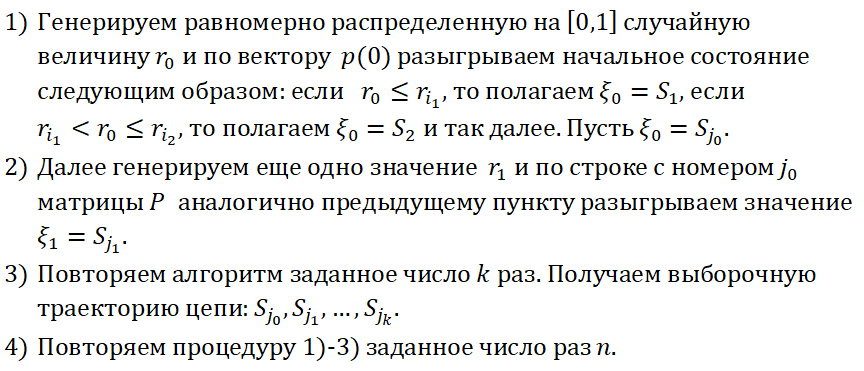

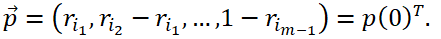

In [ ]:
n = 180
k = 15
m = 6

path = [[0] * k for i in range(n)]

vec = np.cumsum(P, axis=1)
for row in range(n):
    r_0 = np.random.uniform(0, 1)
    if r_0 <= r[0]:
        j_k = 0
    elif r_0 >= r[m - 2]:
      j_k = m - 1
    else:
        for i in range(1, m - 1):
            if r[i-1] < r_0 <= r[i]:
                j_k = i
                break

    path[row][0] = j_k + 1
    for col in range(1, k):
        r_i = np.random.uniform(0, 1)
        if r_i <= P[j_k][0]:
            j_k = 0
        else:
            for j in range(1, m):
                if vec[j_k][j - 1] < r_i <= vec[j_k][j]:
                    j_k = j
                    break
        path[row][col] = j_k + 1

for i in range(10):
  s = ''
  for j in range(k):
    if j == k-1:
      s += f'S_{path[i][j]}'
    else:
      s += f'S_{path[i][j]}' + r'\rightarrow '
  s = s + r'$'
  display(Math(s))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
from collections import Counter

final_elements = [chain[k-1] for chain in path] #Последний столбец (можно chain[-1])
d = Counter(sorted(final_elements)) #считает количество элементов в каждом состоянии и 
                                    #записывает в словарь (ключ - индекс пути; значение - количество) 

print(d)
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df = df.rename(columns={"index": "Номер состояния", 0: "Количество траекторий на k-ом шаге"})
df

Counter({3: 76, 1: 31, 5: 27, 2: 25, 4: 11, 6: 10})


,Номер состояния,Количество траекторий на k-ом шаге
0,1,31
1,2,25
2,3,76
3,4,11
4,5,27
5,6,10


In [ ]:
#p_k = [0.183564, 0.144975, 0.417012, 0.067044, 0.132428, 0.054977]

df['Теоретические вероятности'] = np.around(p_k, 5)
df['Эмпирические вероятности'] = df['Количество траекторий на k-ом шаге'] / n
df

,Номер состояния,Количество траекторий на k-ом шаге,Теоретические вероятности,Эмпирические вероятности
0,1,31,0.19249,0.172222
1,2,25,0.15115,0.138889
2,3,76,0.40041,0.422222
3,4,11,0.06377,0.061111
4,5,27,0.13477,0.150000
5,6,10,0.05742,0.055556


$\Large \ Для \ нахождения \ финальных \ вероятностей \ состояний \ цепи, \ необходимо \ решить \\
 \Large систему \ уравнений:$

$$\Large
    \begin{equation}
        \begin{cases}
            π_1=0.7π_1 + 0.2π_2 + 0.4π_6 \\
            π_2=0.3π_1 + 0.6π_2 \\
            π_3=0.2π_2 + 0.9π_3 + 0.3π_4\\
            π_4=0.1π_3 + 0.4π_4 \\
            π_5=0.3π_4 + 0.8π_5 + 0.1π_6\\
            π_6=0.2π_5 + 0.5π_6 \\
            π_1 + π_2 + π_3 + π_4 + π_5 + π_6=1 \\
        \end{cases}
    \end{equation}
$$

In [ ]:
df['Финальные вероятности'] = np.array([16/105, 4/35, 16/35, 8/105, 1/7, 2/35])
df

,Номер состояния,Количество траекторий на k-ом шаге,Теоретические вероятности,Эмпирические вероятности,Финальные вероятности
0,1,31,0.19249,0.172222,0.152381
1,2,25,0.15115,0.138889,0.114286
2,3,76,0.40041,0.422222,0.457143
3,4,11,0.06377,0.061111,0.076190
4,5,27,0.13477,0.150000,0.142857
5,6,10,0.05742,0.055556,0.057143
